# CHAPTER 13: Conjugate Gradient Method

### This code runs simulations for Example 2 and generates figure 1 from Chapter 13:  Conjugate Gradient Method (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions:

1. find_alpha
2. generate_logistic
3. gradP
4. logistic_minimizer
5. risk_value

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from find_alpha import find_alpha
from generate_logistic import generate_logistic
from gradP import gradP
from logistic_minimizer import logistic_minimizer
from risk_value import risk_value

## *Example 13.2 - Application to logistic regression*

We illustrate the operation of the Fletcher--Reeves algorithm by considering the $\ell_2-$regularized logistic regression risk function:

$$
P(w) = \rho\|w\|^2 + \frac{1}{N}\sum_{m=0}^{N-1} \ln\left(1+e^{-{\gamma}(m) h_m^T w}\right) \quad \text{(13.91)}
$$

For this simulation, the data $\{\gamma(m),h_m\}$ are generated {\em randomly} as follows. First, a $10$th-order random parameter model $w^a\in\mathbb{R}^{10}$ is selected, and $N=200$ random feature vectors $\{h_m\}$ are generated, say, with zero-mean unit-variance Gaussian entries. Then, for each $h_m$, the label $\gamma(m)$ is set to either $+1$ or $-1$ according to the following construction:

$$
\gamma(m) = \begin{cases}
+1 & \text{if } \left(\dfrac{1}{1+e^{-h_m^T w^a}}\right) \geq 0.5 \\
-1 & \text{otherwise}
\end{cases} \quad \text{(13.92)}
$$

We will explain in future expression ($59.5a$) that construction ($13.92$) amounts to generating data $\{\gamma(m),h_m\}$ that satisfy a logistic probability model. The Fletcher--Reeves algorithm ($13.87$) is run for $100$ iterations on the data $\{\gamma(m),h_m\}$ using parameters

$$
\rho=2,\;\;\mu=0.001,\;\;\lambda=1\times 10^{-4},\;\;\eta=0.1,\;\;\kappa=0.2 \quad \text{(13.93)}
$$

The maximum number of iterations for the line search procedure ($13.86$) is set to $20$. Every $M=10$ iterations, we reset the $q-$variable to zero. The minimizer $w^{\star}$ and the resulting weight iterate after $L=100$ iterations are shown in the bottom plot of Fig.$~13.1$; the minimal risk value is found to be

$$
P(w^{\star})\approx 0.6818 \quad \text{(13.94)}
$$

The two plots in the top row display the learning curve $P(w_m)$ relative to the minimum risk value $P(w^{\star})$, both in linear scale on the left and in normalized logarithmic scale on the right (according to construction ($11.65$). 

fraction of +1 in generated data; desirable to be close to 0.5
0.495
wait...generating data
limit point and w-star:
[[ 0.02723906]
 [ 0.01554087]
 [-0.02791135]
 [-0.04866216]
 [-0.01522433]
 [-0.01459715]
 [-0.00210766]
 [ 0.00416097]
 [ 0.03526147]
 [-0.0285703 ]]
[[ 0.02723906]
 [ 0.01554087]
 [-0.02791135]
 [-0.04866216]
 [-0.01522433]
 [-0.01459715]
 [-0.00210766]
 [ 0.00416097]
 [ 0.03526147]
 [-0.0285703 ]]
minimum risk value:
0.6791201474888431


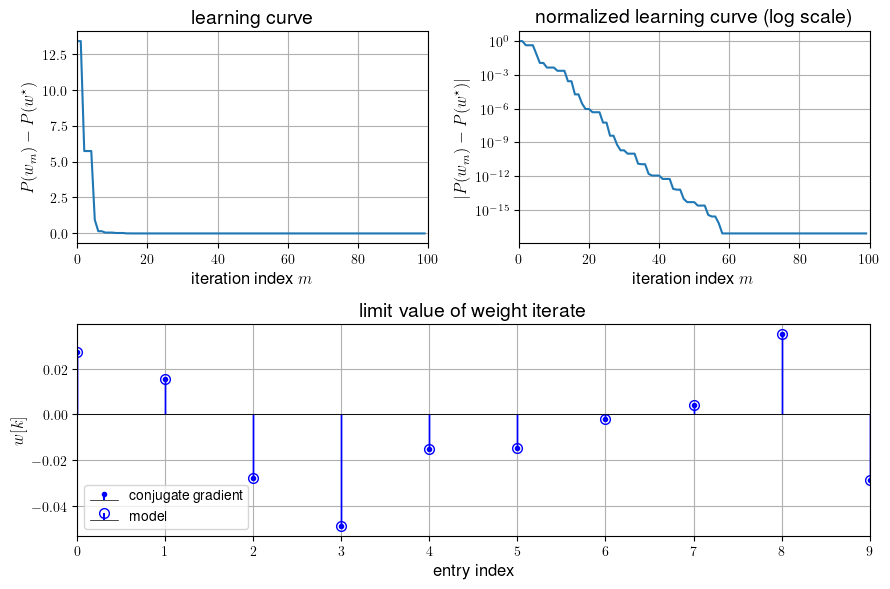

In [22]:
# l2-regularized logistic empirical risk
# P(w) = rho\|w\|^2 + (1/N) sum_{n=0}^{N-1} ln(1+exp(-gamma(n)h_n'w))

rho = 2    # regularization parameter
mu = 0.001 # step-size

M = 10    # size of feature vectors
N = 200   # number of data points
L = 100  # number of gradient-descent iterations

# generating data
zo = np.random.randn(M).reshape(-1,1) # randomly chosen parameter for logistic model
p, gamma_vec, H = generate_logistic(N,zo,0) # generates logistic data
print('fraction of +1 in generated data; desirable to be close to 0.5')
print(p) # desirable to be close to 0.5
print('wait...generating data')
ws, Ps, thetas = logistic_minimizer(rho, gamma_vec, H, 0) # minimizer and minimum risk value

w = np.random.randn(M).reshape(-1,1) # initial condition
beta = 0
q = np.zeros(M).reshape(-1,1)
P = np.zeros(L).reshape(-1,1) # risk values

g = gradP(H,gamma_vec,w,rho) # initial gradient vector

for n in range(L):
    if (n+1) % M == 0 :
        q = np.zeros(M).reshape(-1,1) # reset q to zero every M iterations
    P[n] = risk_value(H,gamma_vec,w,rho)
    r = -g
    q = r + beta*q # conjugate vector  
    
    alpha = find_alpha(H,gamma_vec,w,rho,P[n],g,q) # line search
    w = w + alpha*q
    g_new = gradP(H,gamma_vec,w,rho) # updated gradient
    beta = (np.linalg.norm(g_new)**2)/(np.linalg.norm(g)**2)
    g = g_new

print('limit point and w-star:')
print(w)
print(ws)

print('minimum risk value:')
print(Ps[0,0])

#figure 1 (Learning curves)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9,6))

plt.subplot(221)
plt.plot(range(L), P-Ps) # learning curve
plt.xlabel('iteration index $m$', fontsize = 12)
plt.ylabel('$$P(w_m)-P(w^{\star})$$', fontsize = 12)
plt.title('learning curve', fontsize = 14)
plt.xlim([0, 100])
plt.grid()

X = (P-Ps) + 1e-20 # added a small perturbation to avoid log(0)

plt.subplot(222)
## here, in the MATLAB code it plots X/max(X) without the absolute value,
## but after a point, the value becomes a really small but negative, in order to 
## prevent that and have a plot like in the book I used absolute value
plt.semilogy(range(L), np.abs(X/max(X)) ) # learning curve
plt.xlabel('iteration index $m$', fontsize = 12)
plt.ylabel('$$|P(w_m)-P(w^{\star})|$$', fontsize = 12) 
plt.title('normalized learning curve (log scale)', fontsize = 14)
plt.xlim([0, 100])
# plt.ylim([1e-20, 1])
plt.grid()

plt.subplot(212)

markerline, stemlines, baseline = plt.stem(w, markerfmt='bo', linefmt='b', basefmt='k', label='conjugate gradient')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5) 
markerline.set_markersize(3) # make the circles smaller to match with the book

markerline, stemlines, baseline = plt.stem(ws, markerfmt='bo', linefmt='b', basefmt='k', label='model')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5) 
markerline.set_markersize(7) # make the circles smaller to match with the book
markerline.set_markerfacecolor('none') # make the squares hollow to match with the book

plt.xlabel('entry index', fontsize = 12)
plt.ylabel('$$w[k]$$', fontsize = 12)
plt.title('limit value of weight iterate', fontsize = 14)
plt.xlim([0, 9])
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Figure $13.1$** (*Top*) Learning curves $P(w_m)$ relative to the minimum risk value $P(w^{\star})$ in linear scale (on the left) and in normalized logarithmic scale (on the right) generated by the Fletcher--Reeves algorithm. (*Bottom*) Limiting value of the weight iterate $w_m$, which tends to the minimizer $w^{\star}$.